# Evaluate gridworld dataset

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from src.env.gridworld import Gridworld
from src.visualization.gridworld import GridworldVis
from src.tabular.utils import compute_state_marginal, compute_state_action_marginal, entropy

/Users/hfml/opt/miniconda3/envs/irl/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# load data
data_path = "../data/gridworld/"
with open(os.path.join(data_path, "data_one_state_one_goal.p"), "rb") as f:
    data_1 = pickle.load(f)

with open(os.path.join(data_path, "data_one_state_three_goals.p"), "rb") as f:
    data_2 = pickle.load(f)

with open(os.path.join(data_path, "data_uniform_three_goals.p"), "rb") as f:
    data_3 = pickle.load(f)


In [3]:
# init visualizer
num_grids = 5
env = Gridworld(num_grids)
vis = GridworldVis(env)

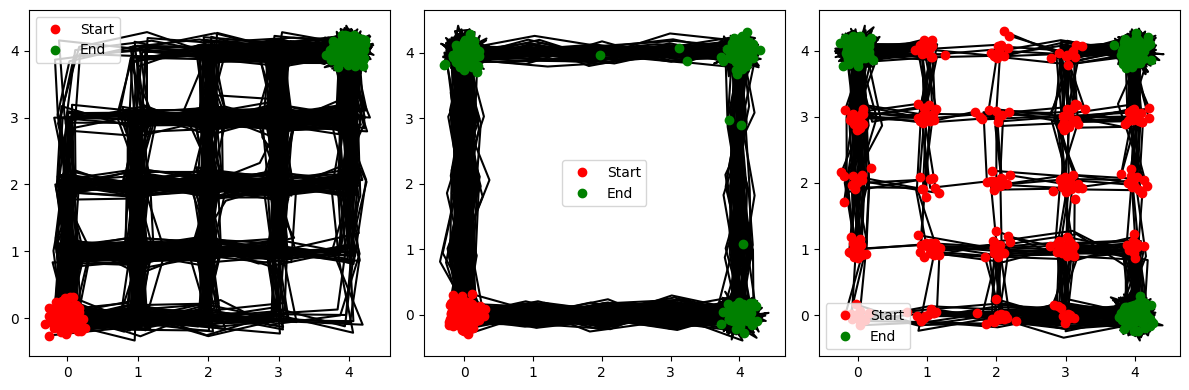

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
vis.plot_sample_path(data_1["s"], ax[0])
vis.plot_sample_path(data_2["s"], ax[1])
vis.plot_sample_path(data_3["s"], ax[2])
plt.tight_layout()
plt.show()

In [11]:
pi_s_1 = compute_state_marginal(data_1, env.state_dim)
pi_s_2 = compute_state_marginal(data_2, env.state_dim)
pi_s_3 = compute_state_marginal(data_3, env.state_dim)

pi_sa_1 = compute_state_action_marginal(data_1, env.state_dim, env.act_dim)
pi_sa_2 = compute_state_action_marginal(data_2, env.state_dim, env.act_dim)
pi_sa_3 = compute_state_action_marginal(data_3, env.state_dim, env.act_dim)

ent_s_1 = entropy(pi_s_1.flatten())
ent_s_2 = entropy(pi_s_2.flatten())
ent_s_3 = entropy(pi_s_3.flatten())

ent_sa_1 = entropy(pi_sa_1.flatten())
ent_sa_2 = entropy(pi_sa_2.flatten())
ent_sa_3 = entropy(pi_sa_3.flatten())

print("data 1 s entropy", ent_s_1)
print("data 2 s entropy", ent_s_2)
print("data 3 s entropy", ent_s_3)

print("data 1 sa entropy", ent_sa_1)
print("data 2 sa entropy", ent_sa_2)
print("data 3 sa entropy", ent_sa_3)

data 1 s entropy 0.9099839198463566
data 2 s entropy 1.4691036914553937
data 3 s entropy 1.3640223592917242
data 1 sa entropy 1.9180572820655035
data 2 sa entropy 2.502962363481813
data 3 sa entropy 2.425738557721028


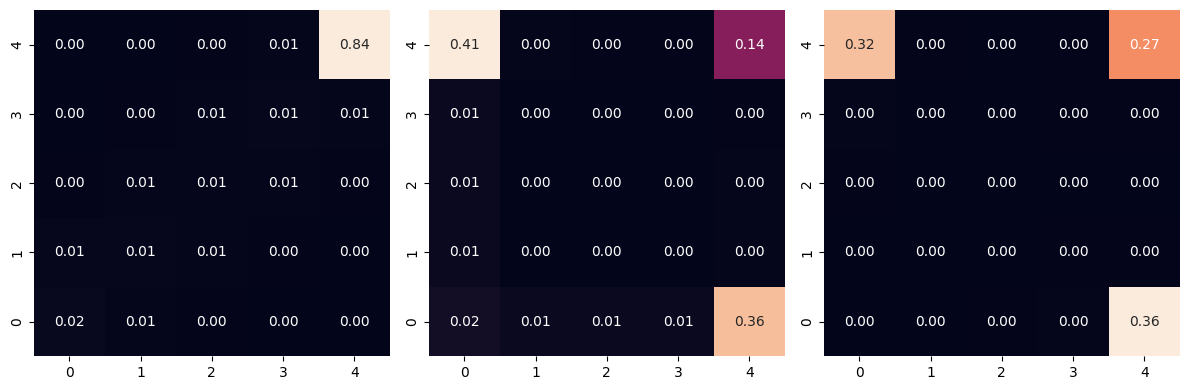

In [12]:
# plot state marginal
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
vis.plot_value_map(pi_s_1, ax[0])
vis.plot_value_map(pi_s_2, ax[1])
vis.plot_value_map(pi_s_3, ax[2])
plt.tight_layout()
plt.show()

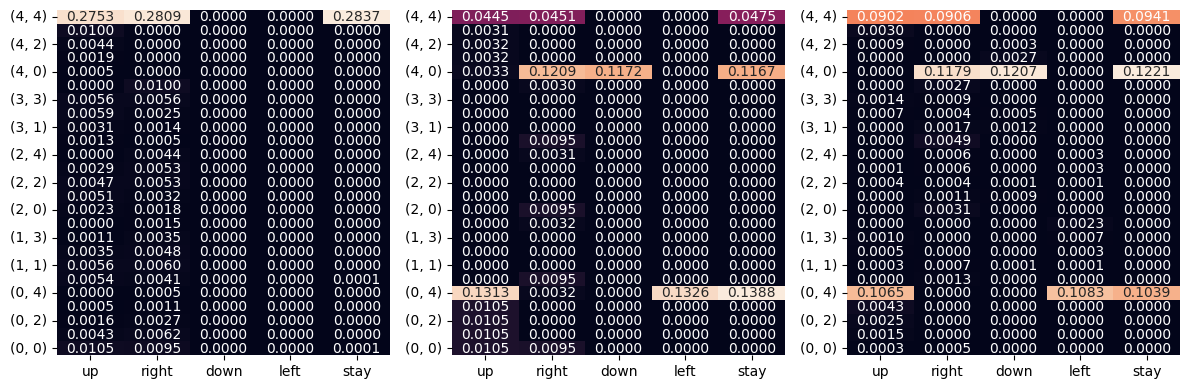

In [13]:
# plot state action marginal
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
vis.plot_state_action(pi_sa_1, ax[0], fmt=".4f")
vis.plot_state_action(pi_sa_2, ax[1], fmt=".4f")
vis.plot_state_action(pi_sa_3, ax[2], fmt=".4f")
plt.tight_layout()
plt.show()